<a href="https://colab.research.google.com/github/arielnbg/Projeto-de-Pesquisa/blob/under/Undersample_e_Grid_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Peso Normal e Macrossomia
Macrossomia: >= 4000g |
Peso Normal: >= 2500g e < 4000g

In [ ]:
from google.colab import drive
drive.mount("/content/drive",True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# load dataset

uri = ('/content/drive/MyDrive/IC/BASE_PRE_PROCESSADA_LITERATURA.csv')

dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,SEXO,PESO,RACACORMAE,QTDPARTCES,ESCMAEAGR1
0,1,37,2.0,0.0,0.0,0.0,1.0,2,0.0,4.0,0.0,6.0
1,2,16,9.0,1.0,0.0,0.0,1.0,1,0.0,1.0,0.0,4.0
2,3,22,5.0,1.0,0.0,0.0,1.0,2,0.0,4.0,0.0,6.0
3,5,20,2.0,1.0,0.0,0.0,1.0,2,0.0,1.0,0.0,6.0
4,6,20,5.0,1.0,0.0,0.0,1.0,1,0.0,4.0,0.0,6.0


In [ ]:
dados['PESO'].value_counts()

PESO
0.0    424121
1.0     30261
Name: count, dtype: int64

In [ ]:
PN = dados.loc[dados["PESO"] == 0]
MACRO = dados.loc[dados["PESO"] == 1]

under_PN = PN.sample(len(MACRO))

df_balanceado = pd.concat([MACRO, under_PN])
#pd. é o concat "juntando as variáveis de MACRO E under_PN, para ter as mesmas quantidades de registros"
df_balanceado['PESO'].value_counts()

PESO
1.0    30261
0.0    30261
Name: count, dtype: int64

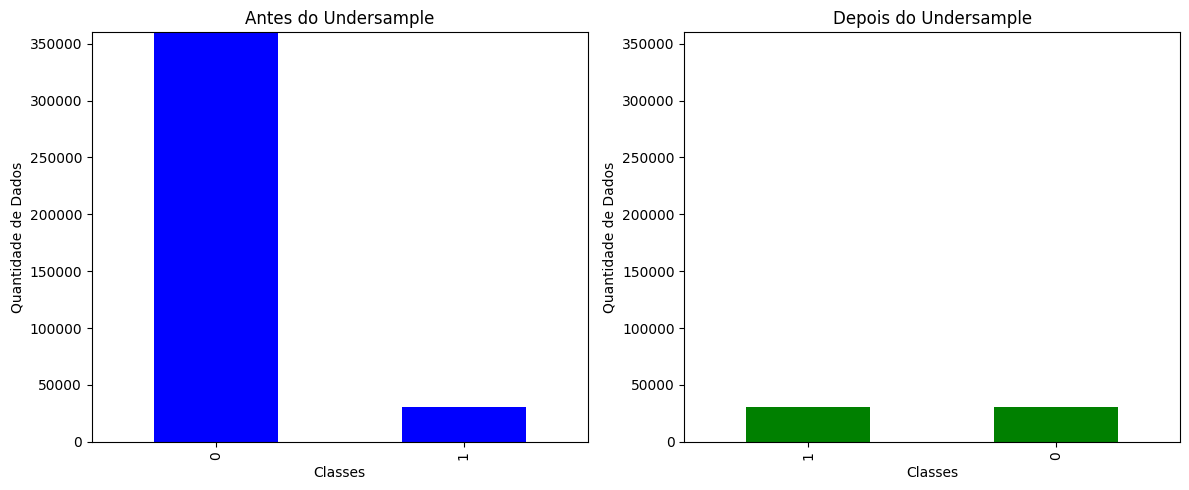

'\n# Simulando os dados como no seu código\ndados = pd.DataFrame({\'PESO\': [0]*360000 + [1]*30261})  # Números alterados para correspondência\n\n# Aplicação do seu código de undersampling\nPN = dados.loc[dados["PESO"] == 0]\nMACRO = dados.loc[dados["PESO"] == 1]\nunder_PN = PN.sample(len(MACRO), random_state=42)  # Usando random_state para reprodutibilidade\ndf_balanceado = pd.concat([MACRO, under_PN])\n\n# Plotando o gráfico antes do undersampling\nplt.figure(figsize=(12, 5))\n\nplt.subplot(1, 2, 1)  # Dois gráficos lado a lado, este é o primeiro\ndados[\'PESO\'].value_counts().plot(kind=\'bar\', color=\'blue\')\nplt.title(\'Antes do Undersample\')\nplt.xlabel(\'Classes\')\nplt.ylabel(\'Quantidade de Dados\')\n\n# Plotando o gráfico depois do undersampling\nplt.subplot(1, 2, 2)  # Este é o segundo gráfico\ndf_balanceado[\'PESO\'].value_counts().plot(kind=\'bar\', color=\'green\')\nplt.title(\'Depois do Undersample\')\nplt.xlabel(\'Classes\')\nplt.ylabel(\'Quantidade de Dados\')\n\npl

In [ ]:

import matplotlib.pyplot as plt

# Simulando os dados como no seu código
dados = pd.DataFrame({'PESO': [0]*360000 + [1]*30261})  # Números alterados para correspondência

# Aplicação do seu código de undersampling
PN = dados.loc[dados["PESO"] == 0]
MACRO = dados.loc[dados["PESO"] == 1]
under_PN = PN.sample(len(MACRO), random_state=42)  # Usando random_state para reprodutibilidade
df_balanceado = pd.concat([MACRO, under_PN])

# Plotando o gráfico antes do undersampling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Dois gráficos lado a lado, este é o primeiro
dados['PESO'].value_counts().plot(kind='bar', color='blue')
plt.title('Antes do Undersample')
plt.xlabel('Classes')
plt.ylabel('Quantidade de Dados')

# Captura a quantidade máxima de dados para definir um limite comum
max_y = max(dados['PESO'].value_counts().max(), df_balanceado['PESO'].value_counts().max())

# Ajustando o eixo y para ter o mesmo limite
plt.ylim(0, max_y)

# Plotando o gráfico depois do undersampling
plt.subplot(1, 2, 2)  # Este é o segundo gráfico
df_balanceado['PESO'].value_counts().plot(kind='bar', color='green')
plt.title('Depois do Undersample')
plt.xlabel('Classes')
plt.ylabel('Quantidade de Dados')

# Ajustando o eixo y para ter o mesmo limite
plt.ylim(0, max_y)

plt.tight_layout()
plt.show();  # Nota o ponto e vírgula aqui para suprimir saída extra

'''
# Simulando os dados como no seu código
dados = pd.DataFrame({'PESO': [0]*360000 + [1]*30261})  # Números alterados para correspondência

# Aplicação do seu código de undersampling
PN = dados.loc[dados["PESO"] == 0]
MACRO = dados.loc[dados["PESO"] == 1]
under_PN = PN.sample(len(MACRO), random_state=42)  # Usando random_state para reprodutibilidade
df_balanceado = pd.concat([MACRO, under_PN])

# Plotando o gráfico antes do undersampling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Dois gráficos lado a lado, este é o primeiro
dados['PESO'].value_counts().plot(kind='bar', color='blue')
plt.title('Antes do Undersample')
plt.xlabel('Classes')
plt.ylabel('Quantidade de Dados')

# Plotando o gráfico depois do undersampling
plt.subplot(1, 2, 2)  # Este é o segundo gráfico
df_balanceado['PESO'].value_counts().plot(kind='bar', color='green')
plt.title('Depois do Undersample')
plt.xlabel('Classes')
plt.ylabel('Quantidade de Dados')

plt.tight_layout()
plt.show() '''


In [ ]:
if 'Unnamed: 0' in df_balanceado.columns:
    df_balanceado.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
# Importando a função train_test_split
from sklearn.model_selection import train_test_split

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

NameError: name 'X' is not defined

In [ ]:
df_balanceado.to_csv('/content/drive/MyDrive/IC/POWER_BI_BASE_LITERATURA_BALANCEADA.csv', sep = ',')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

#GridSearch Decision Tree


In [ ]:
df_balanceado['PESO'].value_counts()

PESO
1    30261
0    30261
Name: count, dtype: int64

In [ ]:
#Aqui iremos passar as definições do gridsearch para o modelo Decision Tree

# Defina o modelo
model_decision = DecisionTreeClassifier()

# Defina o espaço de hiperparâmetros
param_grid = {
    'criterion': ['gini', 'entropy'],  # Critério para medir a qualidade da divisão
    'splitter': ['best', 'random'],    # Estratégia usada para dividir em cada nó
    'max_depth': [None, 10, 20, 30, 40, 50],  # Profundidade máxima da árvore
    'min_samples_split': [2, 5, 10],   # Número mínimo de amostras necessárias para dividir um nó interno
    'min_samples_leaf': [1, 2, 4],     # Número mínimo de amostras necessárias em uma folha
    'max_features': [None, 'sqrt', 'log2'],  # Número máximo de recursos a serem considerados em cada divisão
    'random_state': [None, 42]  # Semente aleatória para a reprodutibilidade
}

cross_validation = 10

In [ ]:
gridsearch_decision_tree = GridSearchCV(estimator=model_decision, param_grid=param_grid, cv=cross_validation, scoring='accuracy', verbose=2, n_jobs=-1)


In [ ]:
gridsearch_decision_tree.fit(X_train, y_train)

Fitting 10 folds for each of 1296 candidates, totalling 12960 fits


ValueError: 
All the 12960 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 186, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 579, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 940, in check_array
    raise ValueError(
ValueError: Found array with 0 feature(s) (shape=(38128, 0)) while a minimum of 1 is required by DecisionTreeClassifier.

--------------------------------------------------------------------------------
6480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 186, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 579, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 940, in check_array
    raise ValueError(
ValueError: Found array with 0 feature(s) (shape=(38129, 0)) while a minimum of 1 is required by DecisionTreeClassifier.


In [ ]:
gridsearch_decision_tree.best_params_

In [ ]:
gridsearch_decision_tree.best_score_

In [ ]:
model_decisionTree_classifier = gridsearch_decision_tree.best_estimator_

In [ ]:
y_pred = model_decisionTree_classifier.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))  # no digits vc coloca o número desejado de casas decimais

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=model_decisionTree_classifier.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Peso_Normal','Macrossomia'])
disp.plot()
plt.tight_layout()
plt.show()

#GridSearch Random Forest

In [ ]:
df_balanceado['PESO'].value_counts()

In [ ]:
#Aqui iremos passar as definições do gridsearch para o modelo Random Forest

# Defina o modelo
model_random = RandomForestClassifier()

# Defina o espaço de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

cross_validation = 10

In [ ]:
gridsearch_random_forest = GridSearchCV(estimator=model_random, param_grid=param_grid, cv=cross_validation, scoring='accuracy', verbose=2, n_jobs=-1)


In [ ]:
gridsearch_random_forest.fit(X_train, y_train)


In [ ]:
gridsearch_random_forest.best_params_

In [ ]:
gridsearch_random_forest.best_score_

In [ ]:
model_randomForest_classifier = gridsearch_random_forest.best_estimator_

In [ ]:
y_pred = model_randomForest_classifier.predict(X_test)
print(classification_report(y_test, y_pred, digits = 4))

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=model_randomForest_classifier.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Peso_Normal','Macrossomia'])
disp.plot()
plt.tight_layout()
plt.show()

#GridSearch Adaboost

In [ ]:
#Aqui iremos passar as definições do gridsearch para o modelo AdaBoost

# Defina o modelo
model_adaboost = AdaBoostClassifier()

# Defina o espaço de hiperparâmetros
param_grid = {
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
    'n_estimators': [50, 100, 200],  # Número de estimadores (número de iterações)
    'learning_rate': [0.01, 0.1, 1.0],  # Taxa de aprendizado
    'algorithm': ['SAMME', 'SAMME.R']  # Algoritmo para calcular os pesos dos estimadores
}

cross_validation = 10

In [ ]:
gridsearch_adaboost = GridSearchCV(estimator=model_adaboost, param_grid=param_grid, cv=cross_validation, scoring='accuracy', verbose=2, n_jobs=-1) #a metrica do score foi a acurácia

In [ ]:
gridsearch_adaboost.fit(X_train, y_train)

In [ ]:
gridsearch_adaboost.best_params_

In [ ]:
gridsearch_adaboost.best_score_

In [ ]:
melhores_parametros_ada = gridsearch_adaboost.best_estimator_

In [ ]:
y_pred = melhores_parametros_ada.predict(X_test)
print(classification_report(y_test, y_pred, digits = 5))

In [ ]:
# Plotar a matriz de confusão do conjunto de teste para AdaBoost

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns

cm = metrics.confusion_matrix(y_test, y_pred, labels=melhores_parametros_ada.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['PesoNormal', 'MACRO'], yticklabels=['PesoNormal', 'MACRO'])
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão do AdaBoost com Grid Search')
plt.show()

# Exibir relatório de classificação do conjunto de teste para AdaBoost
print("\nRelatório de Classificação do Conjunto de Teste para AdaBoost:")
print(classification_report(y_test, y_pred))

In [ ]:
#cm é a matriz de confusão
cm = metrics.confusion_matrix(y_test, y_pred, labels=melhores_parametros_ada.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=('Peso_Normal','Macrossomia'))
disp.plot()
plt.tight_layout()
plt.show()

In [ ]:
#dt = AdaBoostClassifier()
#dt.fit(X_train, y_train)
#y_pred = dt.predict(X_test)
#print(classification_report(y_test, y_pred))